In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('dataset/01-sales_dataset.csv')

In [3]:
df.shape

(5, 2)

In [4]:
df.head()

,year,sales
0,2005,12
1,2006,19
2,2007,29
3,2008,37
4,2009,45


In [5]:
df.describe()

,year,sales
count,5.000000,5.000000
mean,2007.000000,28.400000
std,1.581139,13.296616
min,2005.000000,12.000000
25%,2006.000000,19.000000
50%,2007.000000,29.000000
75%,2008.000000,37.000000
max,2009.000000,45.000000


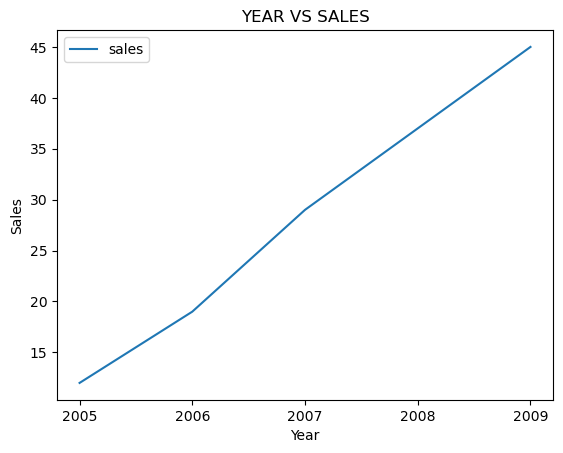

In [6]:
df.plot(x='year', y='sales')
plt.title('YEAR VS SALES')
plt.xticks(np.arange(min(df['year']), max(df['year'])+1, 1.0))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -16744.0
w = [8.35714286]


Text(0, 0.5, 'Sales')

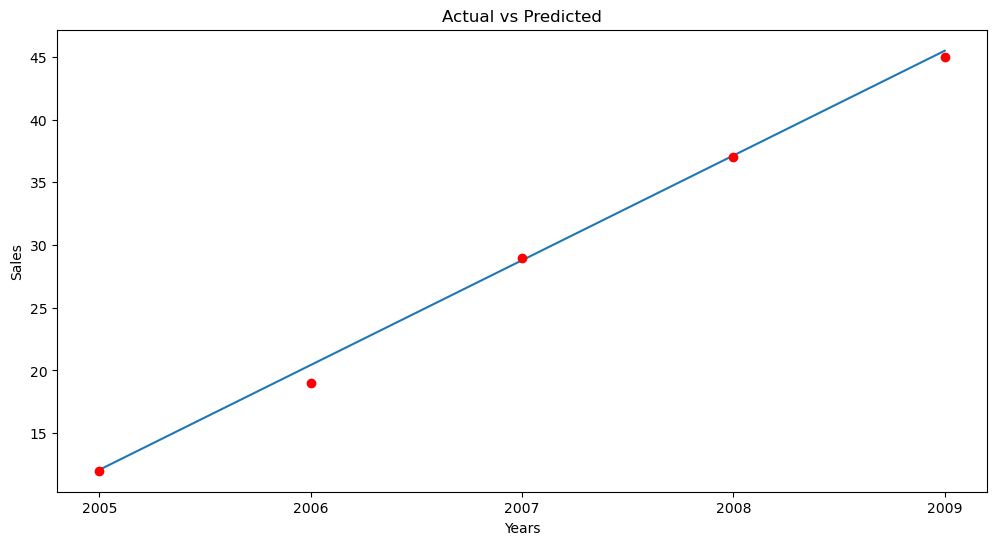

In [12]:
all_y_pred = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(X, all_y_pred) # Regression line
plt.plot(X, y, 'ro') # Scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.xlabel('Years')
plt.ylabel('Sales')

In [13]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 1.15
Coefficient of determination: 0.99


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv('dataset/02-profits_and_populations.csv')

In [28]:
df.shape

(97, 2)

In [29]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [30]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


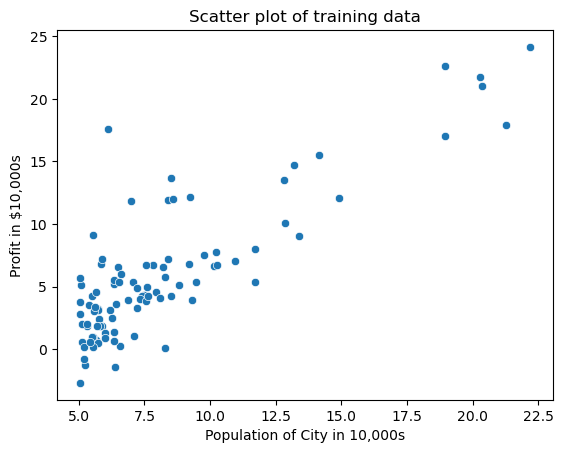

In [33]:
ax = sns.scatterplot(x='population', y='profit', data=df)
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Scatter plot of training data');

In [34]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)), df.population.values.reshape(-1,1)))
y = np.array(df.profit.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

iterations = 1500
alpha = 0.01

In [35]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [36]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [37]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [38]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [39]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
 -3.6303
  1.1664


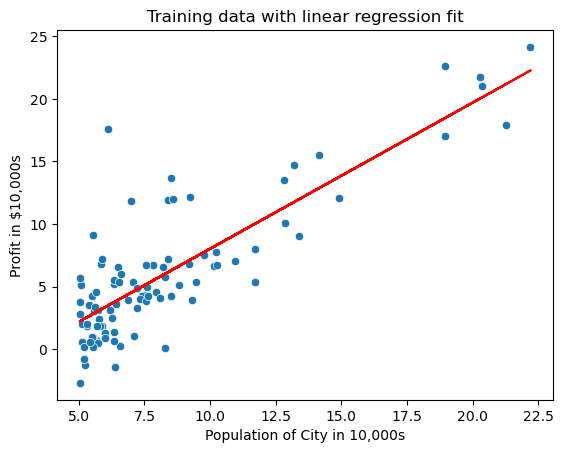

In [40]:
ax = sns.scatterplot(x='population', y='profit', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');


In [41]:
y_pred = np.array([1, 3.5]).dot(theta)
f'For population = 35,000, we predict a profit of {y_pred[0]*10000}'

'For population = 35,000, we predict a profit of 4519.7678677017675'

In [42]:
y_pred = np.array([1, 7]).dot(theta)
f'For population = 70,000, we predict a profit of {y_pred[0]*10000}'

'For population = 70,000, we predict a profit of 45342.45012944714'

In [43]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [44]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [45]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

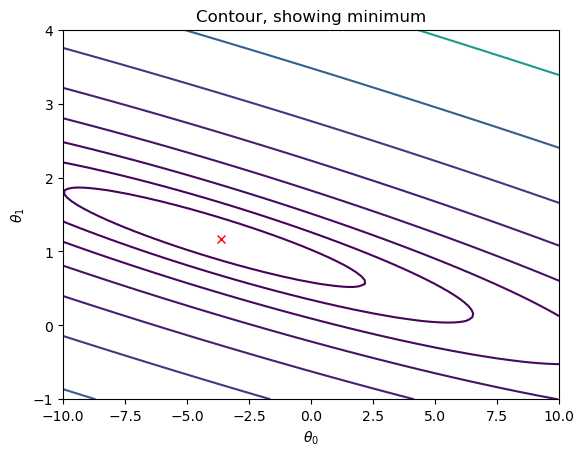

In [46]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df.population.values.reshape(-1,1), 
            df.profit.values.reshape(-1,1))

LinearRegression()

In [48]:
lin_reg.intercept_, lin_reg.coef_

(array([-3.89578088]), array([[1.19303364]]))